In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [59]:
sam= pd.read_csv("C:/Users/lohitr/Downloads/Hackathon/TimeSeries_Janata_Electricity/train_6BJx641.csv")

In [60]:
sam

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0


In [61]:
sam.drop(['var2','ID','var1','pressure','temperature','windspeed'],axis=1, inplace=True)

In [ ]:
sam.columns

In [ ]:
sam.describe()

In [ ]:
sam.info()

In [ ]:
sam.ID.nunique()

In [ ]:
sam.ID.unique()

In [ ]:
sam.datetime.unique()

In [ ]:
sam.temperature.unique()

In [ ]:
sam.var1.unique()

In [ ]:
sam.pressure.unique()

In [ ]:
sam.windspeed.unique()

In [ ]:
sam.var2.unique(), sam.windspeed.unique()

In [ ]:
sam.electricity_consumption.unique()

In [64]:
###Converting to datetime format

sam.index = pd.to_datetime(sam['datetime'], format='%Y-%m')

In [ ]:

###Setting index as the datetime column for easier manipulations

#y = sam.set_index('datetime')

In [65]:
sam.drop(['datetime'],axis=1, inplace=True)

In [66]:
sam

,electricity_consumption
datetime,
2013-07-01 00:00:00,216.0
2013-07-01 01:00:00,210.0
2013-07-01 02:00:00,225.0
2013-07-01 03:00:00,216.0
2013-07-01 04:00:00,222.0
...,...
2017-06-23 19:00:00,225.0
2017-06-23 20:00:00,213.0
2017-06-23 21:00:00,213.0


In [67]:
sam.head()

,electricity_consumption
datetime,
2013-07-01 00:00:00,216.0
2013-07-01 01:00:00,210.0
2013-07-01 02:00:00,225.0
2013-07-01 03:00:00,216.0
2013-07-01 04:00:00,222.0


In [68]:
from scipy import stats
z = np.abs(stats.zscore(sam))
print(z)

[[0.76245818]
 [0.81800421]
 [0.67913913]
 ...
 [0.79023119]
 [0.81800421]
 [0.81800421]]


In [71]:
sam = sam[(z < 3).all(axis=1)]

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

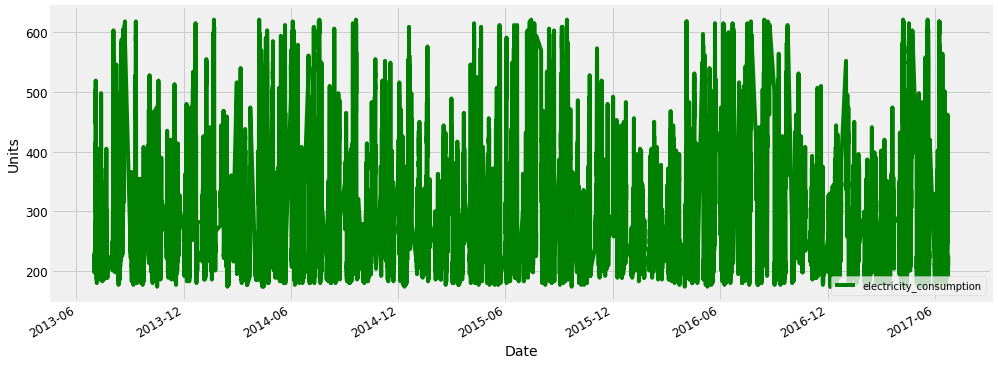

In [72]:
sam['electricity_consumption'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

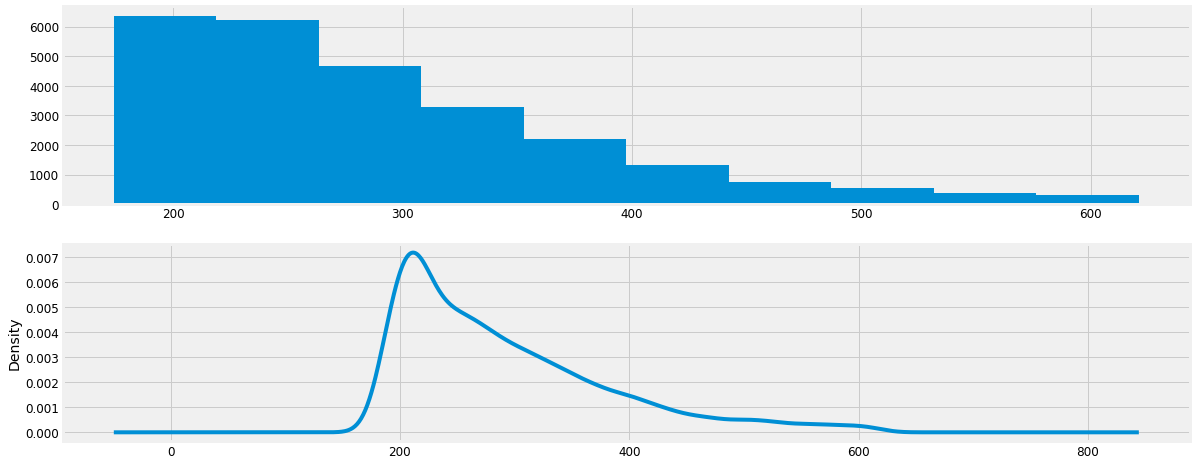

In [73]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
sam.electricity_consumption.hist()
pyplot.subplot(212)
sam.electricity_consumption.plot(kind='kde')
pyplot.show()

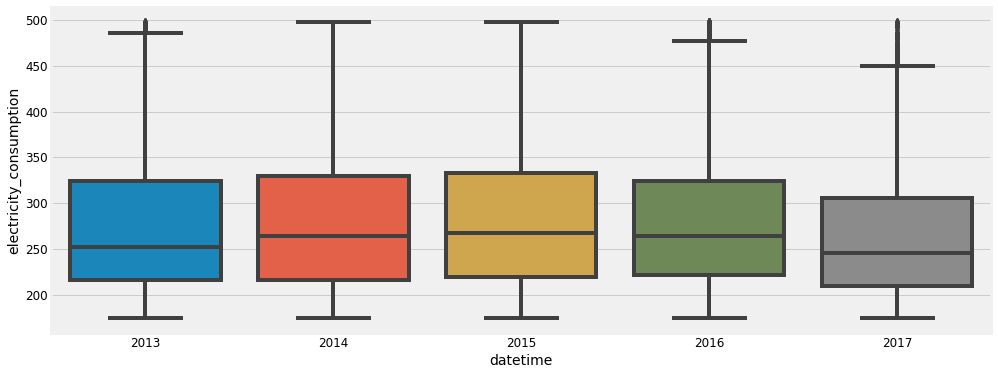

In [76]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(sam.electricity_consumption.index.year, sam.electricity_consumption, ax=ax)

In [75]:
sam = sam[sam.electricity_consumption < 500]

In [77]:
Q1 = sam.quantile(0.25)
Q3 = sam.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

electricity_consumption    108.0
dtype: float64


In [13]:
sam = sam[(z < 3).all(axis=1)]

ValueError: x and y must have same first dimension, but have shapes (5,) and (24907,)

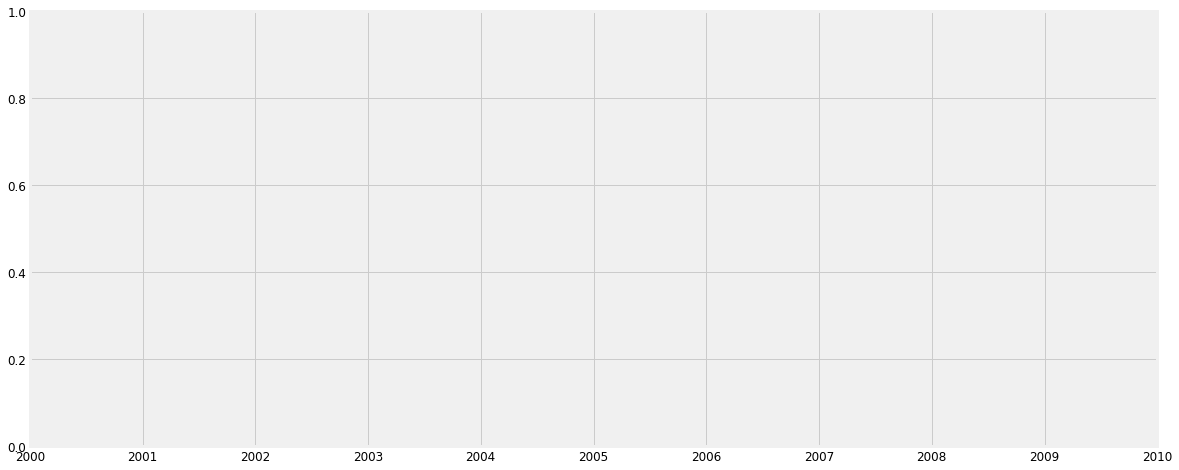

In [79]:
#sum over years
checkin_year_sigma = sam.groupby(pd.Grouper(freq='Y')).count()
#plot year v total checking 
plt.plot(checkin_year_sigma.index, sam.electricity_consumption)

In [14]:
sam.shape

(26007, 1)

In [15]:
def show_plot(sam,figsize=(15,9), color='blue',linestyle='-',xlabel='date',ylabel='electricity consumption',
             label=None):
    plt.figure(figsize=figsize)
    plt.plot(sam.index,sam,color=color,label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)



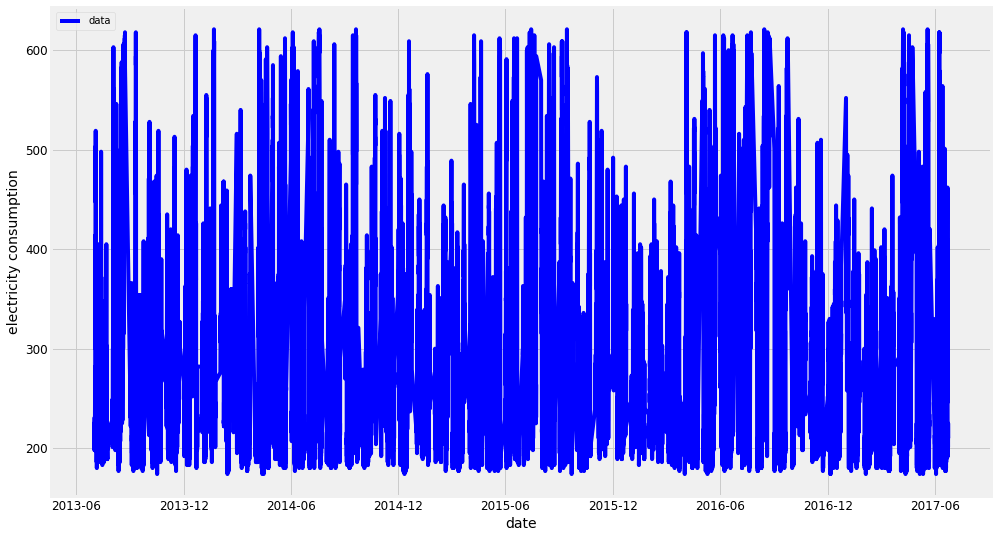

In [16]:
show_plot(sam,label='data')

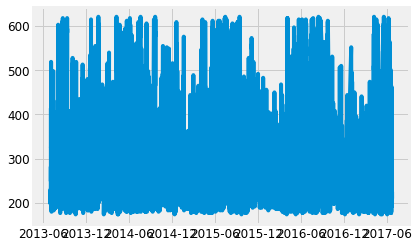

In [17]:
plt.plot(sam)

In [18]:
res = seasonal_decompose(sam,model='additive',freq=30)

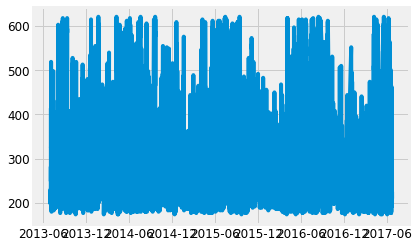

In [19]:
plt.plot(res.observed)

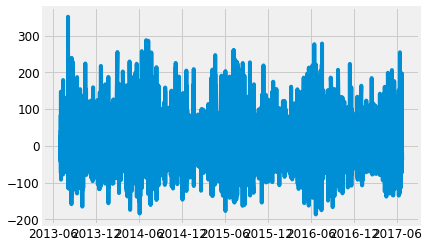

In [20]:
plt.plot(res.resid)

In [ ]:
plt.plot(res.seasonal)

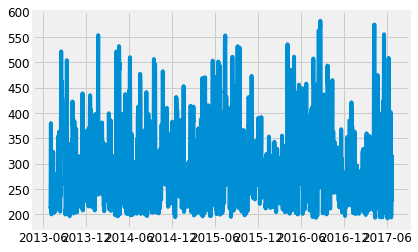

In [21]:
plt.plot(res.trend)

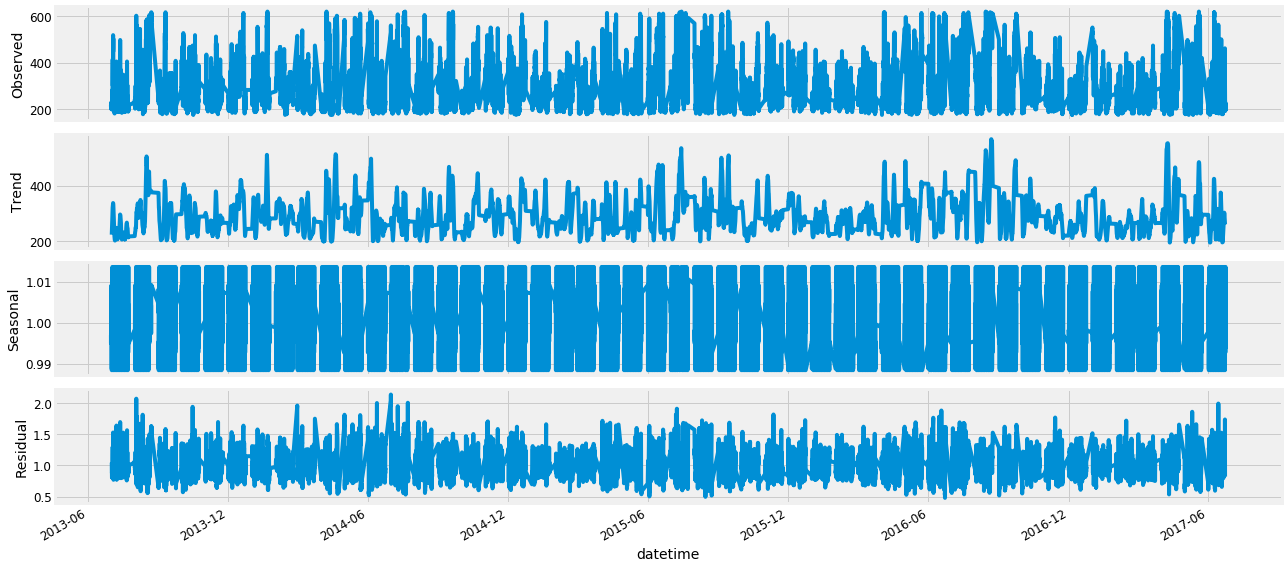

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sam, model='multiplicative',freq=50)
fig = decomposition.plot()
plt.show()

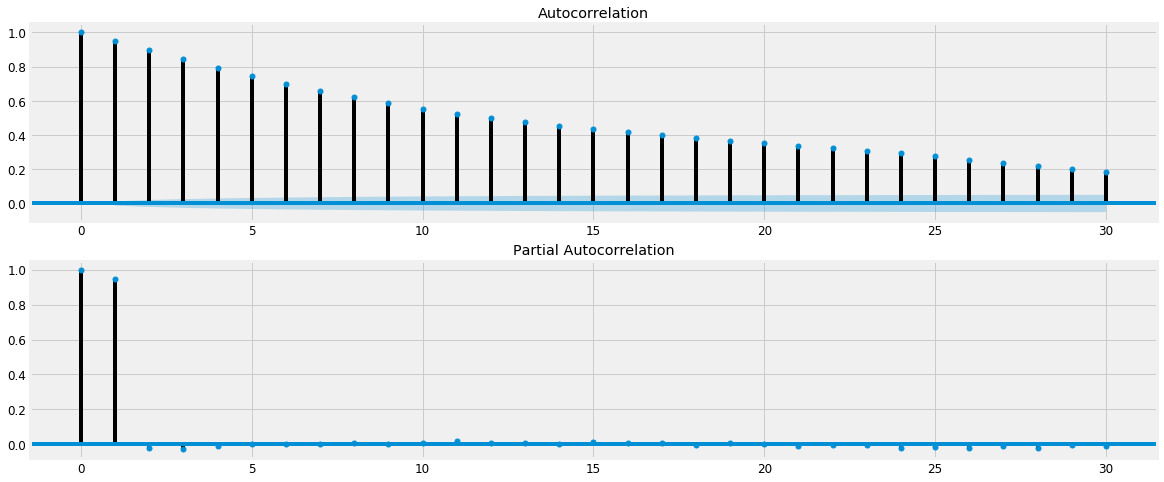

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(sam, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(sam, ax=pyplot.gca(), lags = 30)
pyplot.show()

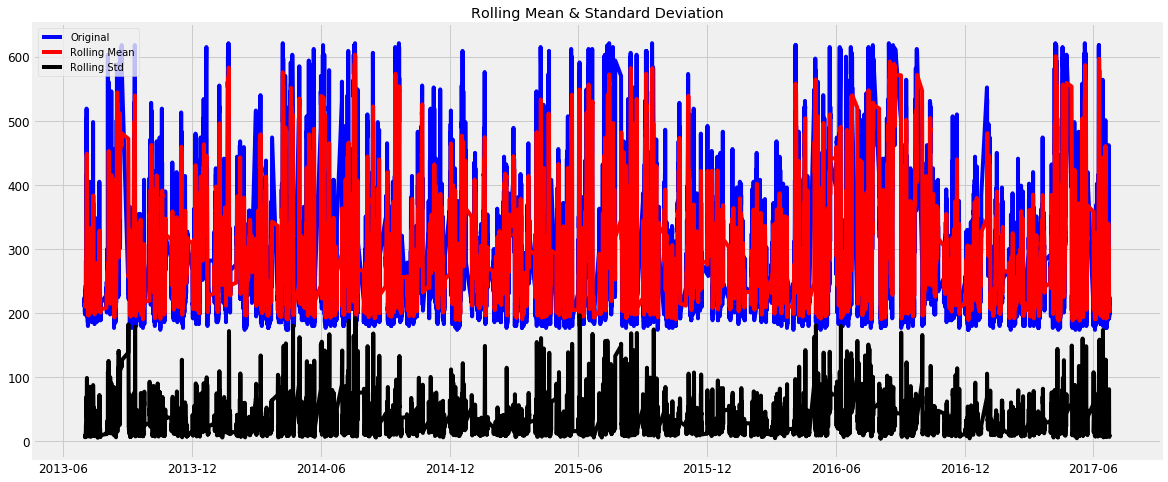

In [25]:
#Determing rolling statistics
rolmean = sam.rolling(12).mean()
rolstd = sam.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(sam, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [27]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(sam.electricity_consumption, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -21.304606
p-value                            0.000000
#Lags Used                        27.000000
Number of Observations Used    25979.000000
Critical Value (1%)               -3.430602
Critical Value (5%)               -2.861651
Critical Value (10%)              -2.566829
dtype: float64


In [28]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =sam.rolling(12).mean()
    rolstd = sam.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

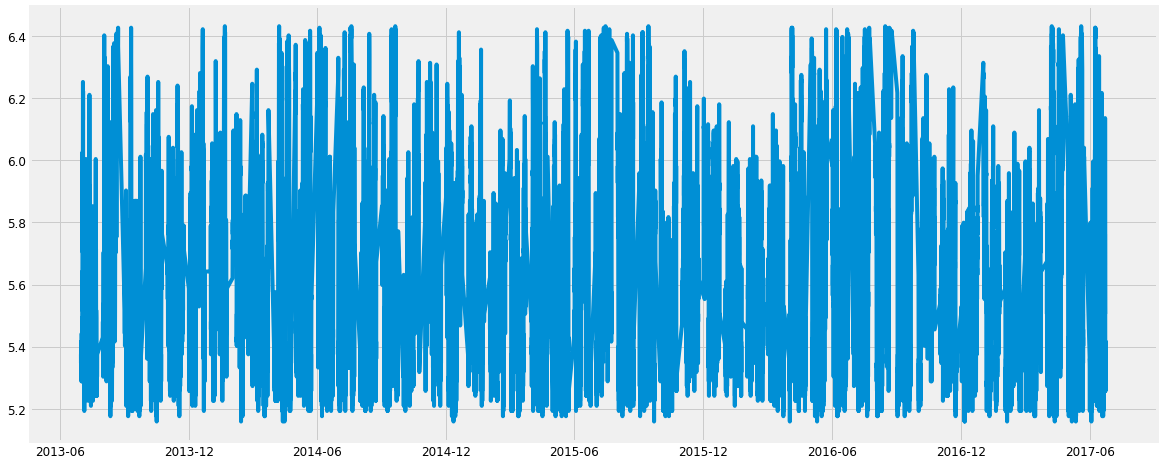

In [29]:
ts_log = np.log(sam.electricity_consumption)
plt.plot(ts_log)

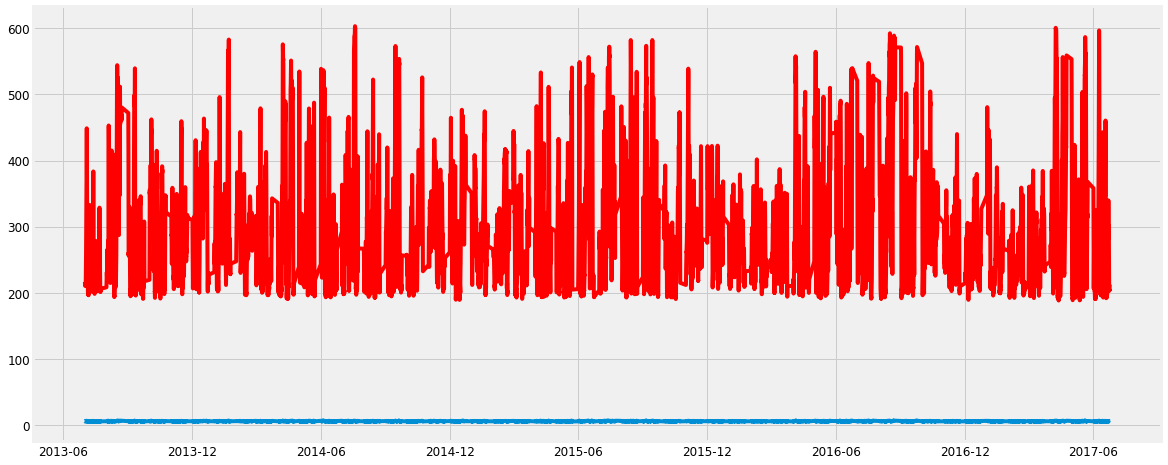

In [30]:
moving_avg = sam.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [32]:
ts_log_moving_avg_diff = sam.electricity_consumption - moving_avg.electricity_consumption
ts_log_moving_avg_diff.head(12)

datetime
2013-07-01 00:00:00     NaN
2013-07-01 01:00:00     NaN
2013-07-01 02:00:00     NaN
2013-07-01 03:00:00     NaN
2013-07-01 04:00:00     NaN
2013-07-01 05:00:00     NaN
2013-07-01 06:00:00     NaN
2013-07-01 07:00:00     NaN
2013-07-01 08:00:00     NaN
2013-07-01 09:00:00     NaN
2013-07-01 10:00:00     NaN
2013-07-01 11:00:00   -12.0
Name: electricity_consumption, dtype: float64

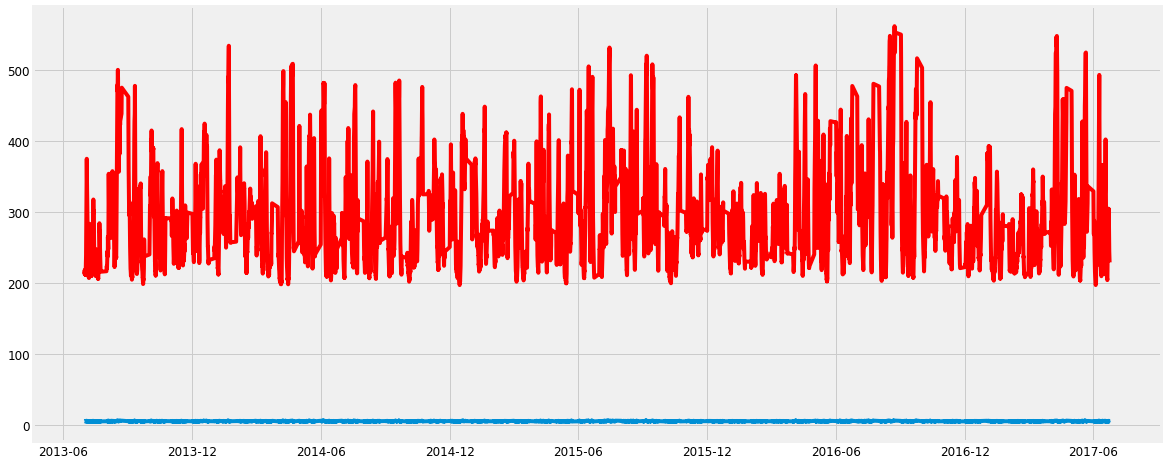

In [38]:
expwighted_avg = sam.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

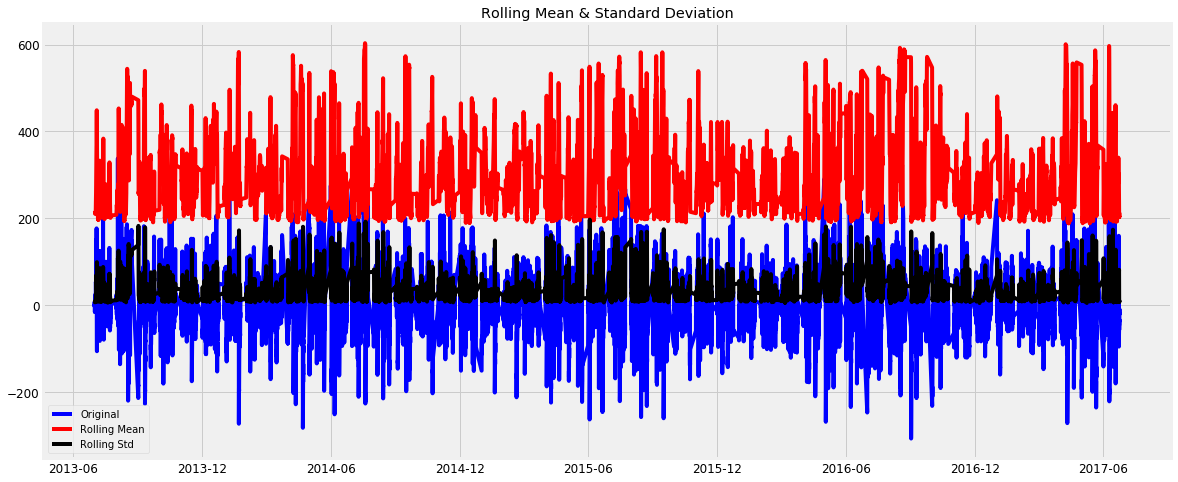

Results of Dickey-Fuller Test:
Test Statistic                   -26.202986
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    25957.000000
Critical Value (1%)               -3.430602
Critical Value (5%)               -2.861651
Critical Value (10%)              -2.566829
dtype: float64


In [39]:
ts_log_ewma_diff = sam.electricity_consumption - expwighted_avg.electricity_consumption
test_stationarity(ts_log_ewma_diff)

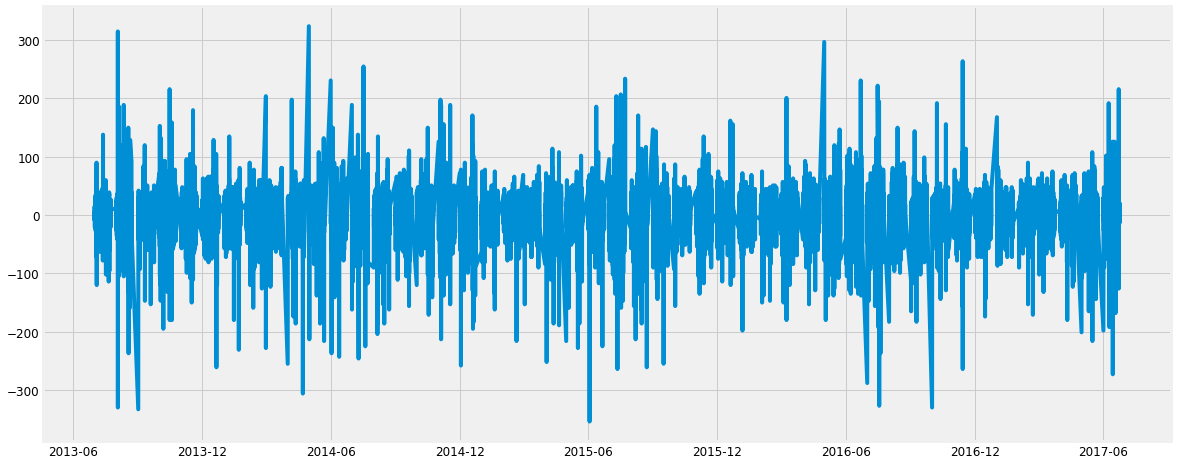

In [40]:
ts_log_diff = sam.electricity_consumption - sam.electricity_consumption.shift()
plt.plot(ts_log_diff)

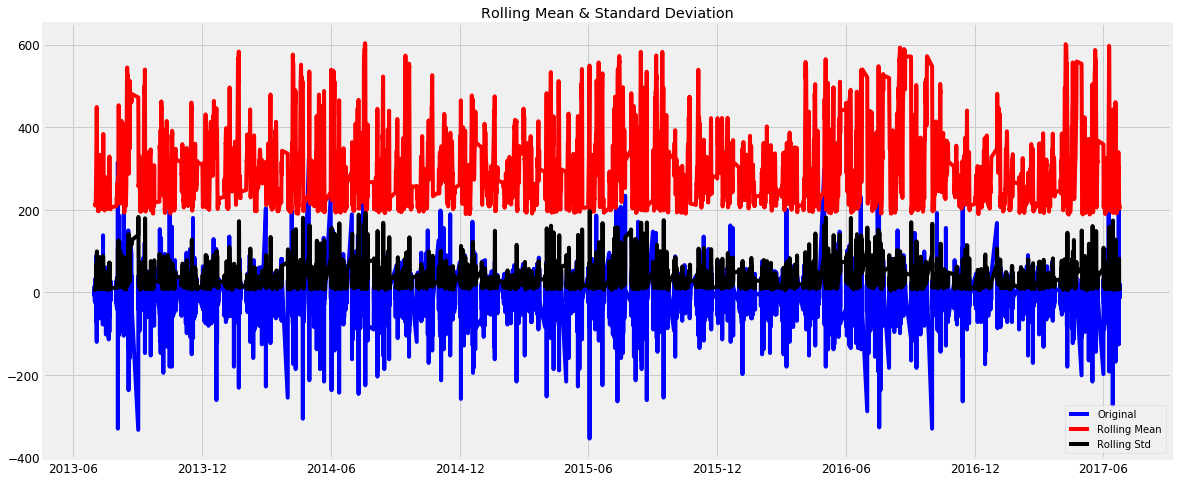

Results of Dickey-Fuller Test:
Test Statistic                   -33.196712
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    25963.000000
Critical Value (1%)               -3.430602
Critical Value (5%)               -2.861651
Critical Value (10%)              -2.566829
dtype: float64


In [41]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

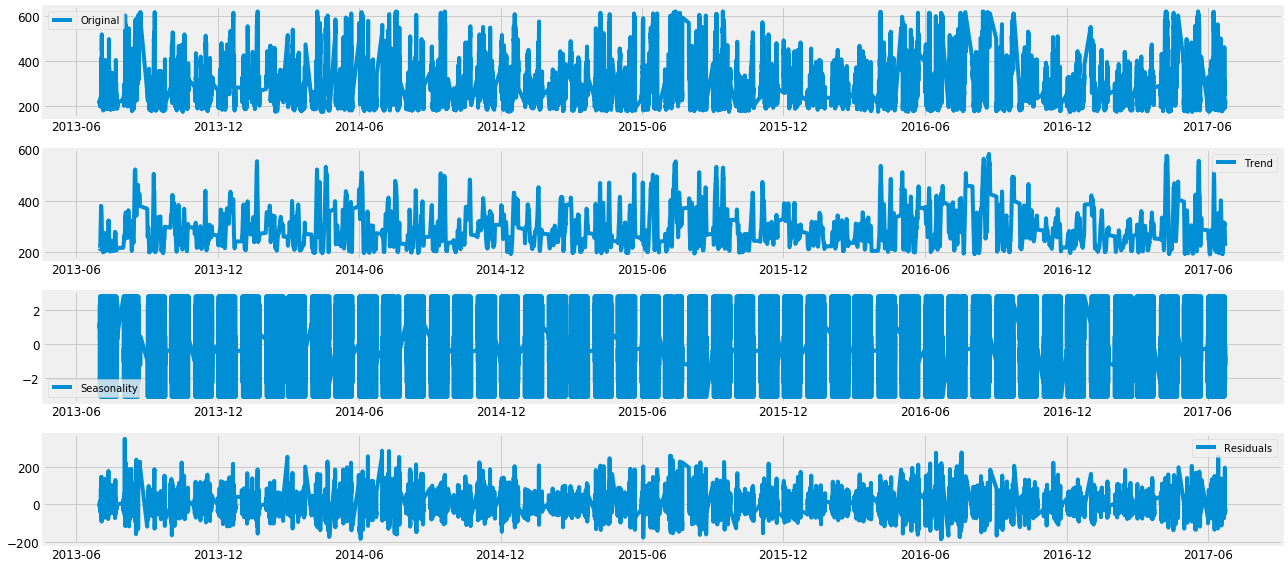

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sam,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(sam, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

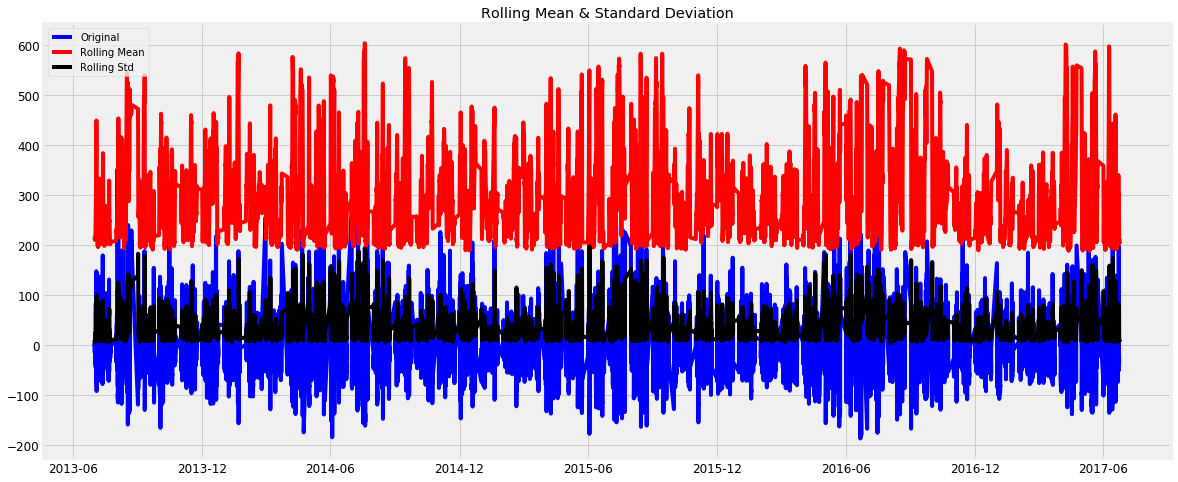

Results of Dickey-Fuller Test:
Test Statistic                   -36.425006
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    25927.000000
Critical Value (1%)               -3.430602
Critical Value (5%)               -2.861651
Critical Value (10%)              -2.566829
dtype: float64


In [45]:
ts_log_decompose = residual.electricity_consumption
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [46]:
from statsmodels.tsa.ar_model import AR
from random import random

In [47]:
# fit model
model = AR(ts_log_diff)
model_fit = model.fit()

C:\Users\lohitr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


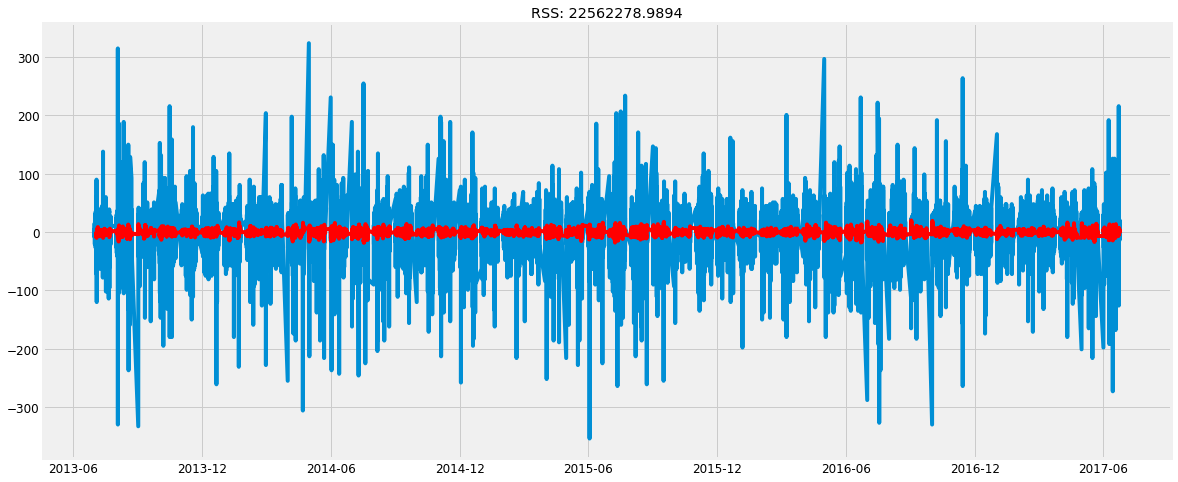

In [48]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [49]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

datetime
2013-07-03 01:00:00   -3.164224
2013-07-03 02:00:00   -2.138223
2013-07-03 03:00:00   -2.360841
2013-07-03 04:00:00   -3.299340
2013-07-03 05:00:00   -5.619916
dtype: float64


In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2013-07-03 01:00:00    -3.164224
2013-07-03 02:00:00    -5.302447
2013-07-03 03:00:00    -7.663288
2013-07-03 04:00:00   -10.962629
2013-07-03 05:00:00   -16.582545
dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(sam.electricity_consumption.iloc[0], index=sam.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

datetime
2013-07-01 00:00:00    216.0
2013-07-01 01:00:00    216.0
2013-07-01 02:00:00    216.0
2013-07-01 03:00:00    216.0
2013-07-01 04:00:00    216.0
dtype: float64

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 229258285208912287632743848268226026425865335665550463774004236108635279671146331528184335976897481539584.0000')

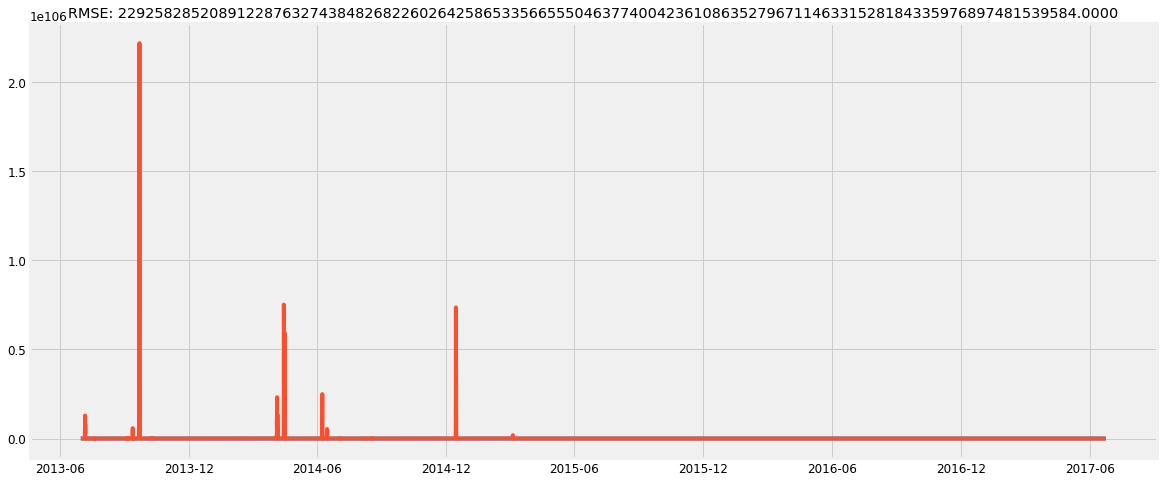

In [57]:
plt.plot(sam.electricity_consumption)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-sam.electricity_consumption)**2)/len(sam.electricity_consumption)))

In [58]:
r2_score(sam.electricity_consumption, predictions_ARIMA)

-6.299094196346389e+204

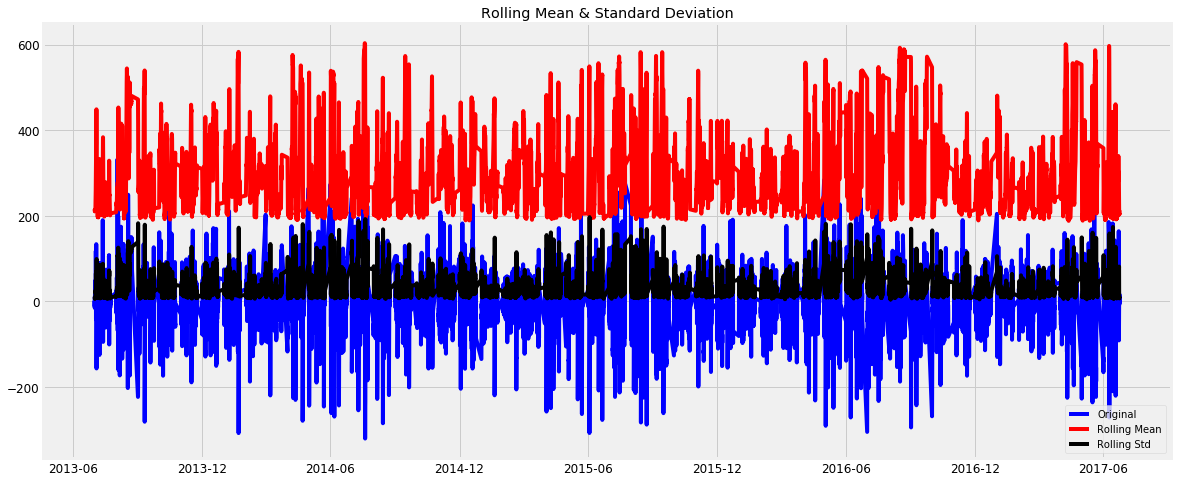

Results of Dickey-Fuller Test:
Test Statistic                   -31.794181
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    25956.000000
Critical Value (1%)               -3.430602
Critical Value (5%)               -2.861651
Critical Value (10%)              -2.566829
dtype: float64


In [34]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
# Second degree polynomial

order=2
coef=np.polyfit(np.arange(len(sam)),sam.values.ravel(),order)
coef

In [ ]:
poly_mdl=np.poly1d(coef)
poly_mdl

In [ ]:
trend= pd.Series(data=poly_mdl(np.arange(len(sam))),index=sam.index)

In [ ]:
plt.plot(sam)
plt.plot(trend)
plt.show()


In [ ]:
detrend= sam['electricity_consumption']-trend

In [ ]:
plt.plot(detrend)

In [ ]:
seasonal= detrend.groupby(by=detrend.index.month).mean()

In [ ]:
plt.plot(seasonal)

In [ ]:
col='electricity_consumption'
seasonal_component= sam
for i in seasonal.index:
    seasonal_component.loc[seasonal_component.index.month==i,col]=seasonal.loc[i]
plt.plot(seasonal_component)

In [ ]:
deseason = sam- seasonal_component
plt.plot(deseason)

In [ ]:
coef=np.polyfit(np.arange(len(deseason)),deseason['electricity_consumption'],order)
coef

In [ ]:
sam

In [ ]:
#Determing rolling statistics
rolmean = pd.rolling_mean(sam, window=12)
rolstd = pd.rolling_std(sam, window=12)

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
residual

In [ ]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(sam.electricity_consumption, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

In [ ]:
sam_zscore

In [ ]:
sam_elec= sam.drop(['Date'], axis=1, inplace=True)

In [ ]:
sam_zscore